In [55]:
from typing import Tuple, List
from collections import OrderedDict
from copy import deepcopy
import matplotlib.pyplot as plt
from operator import itemgetter

In [2]:
# parse input
def make_criterias(A: List[int]) -> (List[int], List[int]):
    Q1 = []
    Q2 = []
    for i in A:
        assert(i < 100)
        Q1.append(i//10)
        Q2.append(i%10)
    return (Q1, Q2)

In [3]:
A = [79, 95, 4, 37, 92, 95, 12, 52, 70, 14]
N = len(A)

In [4]:
Q1, Q2 = make_criterias(A)
assert(len(Q1) == len(Q2) == N)
print(" Alternatives ".center(len(Q1)*3, "#"))
print(f"Q1 = {Q1}")
print(f"Q2 = {Q2}")

######## Alternatives ########
Q1 = [7, 9, 0, 3, 9, 9, 1, 5, 7, 1]
Q2 = [9, 5, 4, 7, 2, 5, 2, 2, 0, 4]


In [5]:
# Create all criterias pairs(in this case)
X = OrderedDict()

for i in range(N):
    # check if criteria exist
    v = X.get((Q1[i], Q2[i]))
    if v:
        v["idx"].append(i) # just add id to list
    else:
        X[(Q1[i], Q2[i])] = {"idx": [i], "remove": False}
print(X)

OrderedDict([((7, 9), {'idx': [0], 'remove': False}), ((9, 5), {'idx': [1, 5], 'remove': False}), ((0, 4), {'idx': [2], 'remove': False}), ((3, 7), {'idx': [3], 'remove': False}), ((9, 2), {'idx': [4], 'remove': False}), ((1, 2), {'idx': [6], 'remove': False}), ((5, 2), {'idx': [7], 'remove': False}), ((7, 0), {'idx': [8], 'remove': False}), ((1, 4), {'idx': [9], 'remove': False})])


In [6]:
# remove items while iterating is bad, so just mark them
def optimal_by_pareto(x: OrderedDict, released=False) -> OrderedDict:
    X = deepcopy(x)
    # def is_crit_optimal(crit):
    # non_pareto = set()
    # print(X)
    keys = list(X.keys())
    N = len(X)
    if N < 1:
        return X
    
    def check_pareto(crit1, crit2):
        # if all c1 is >= then c2, remove c2
        if X[keys[crit1]]["remove"] or X[keys[crit2]]["remove"]:
            return False
        remove = True
        # print(keys[crit1], keys[crit2])
        for c1, c2 in  zip(keys[crit1], keys[crit2]):
            if c2 > c1 or (released and c2 == c1):
                remove = False
                break
        X[keys[crit2]]["remove"] = remove
        return remove    
    
    i = 0
    j = 1
    while i < N-1:
        while j < N:
            if check_pareto(i, j) or not check_pareto(j, i):
                j += 1
                continue
            break

        i += 1
        j = i + 1
    
    P = set()
    for k,v in X.items():
        if not v["remove"]:
            P.add(k)
    return P

In [7]:
optimal_by_pareto(X)

{(7, 9), (9, 5)}

In [8]:
optimal_by_pareto(X, True)

{(7, 9), (9, 2), (9, 5)}

In [80]:
def draw_plot(pairs, optimal):
    
    for (x,y), v in pairs.items():
        plt.plot(x, y, 'ko')
        lable = ""
        for i in v["idx"]:
            lable += f"A{i+1}="
        lable = lable[:-1] # remove last '='

        plt.annotate(lable, (x,y),
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='left')

    plt.xlabel("Q1")
    plt.ylabel("Q2")

    plt.plot(*zip(*optimal))
    plt.grid(True)
    plt.xticks(range(max(pairs.keys(), key = itemgetter(0))[0]+2))
    plt.yticks(range(max(pairs.keys(), key = itemgetter(1))[1]+2))
    plt.show()

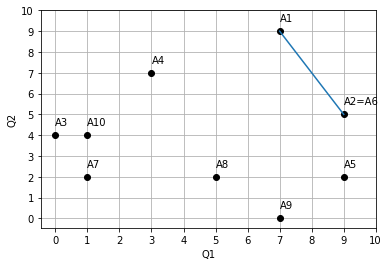

In [81]:
draw_plot(X, optimal_by_pareto(X))

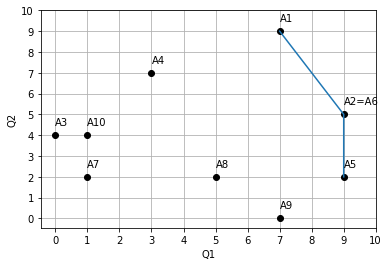

In [82]:
draw_plot(X, optimal_by_pareto(X, True))